# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# display all columns
pd.set_option('display.max_columns',None)

# Loading Dataset

In [3]:
df=pd.read_csv('ecommerce_sales_data (2).csv')

In [4]:
df.head()

,Order Date,Product Name,Category,Region,Quantity,Sales,Profit
0,2024-12-31,Printer,Office,North,4,3640,348.93
1,2022-11-27,Mouse,Accessories,East,7,1197,106.53
2,2022-05-11,Tablet,Electronics,South,5,5865,502.73
3,2024-03-16,Mouse,Accessories,South,2,786,202.87
4,2022-09-10,Mouse,Accessories,West,1,509,103.28


In [5]:
# dataset shape
df.shape

(3500, 7)

In [6]:
# columns names
df.columns

Index(['Order Date', 'Product Name', 'Category', 'Region', 'Quantity', 'Sales',
       'Profit'],
      dtype='object')

In [7]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3500 non-null   object 
 1   Product Name  3500 non-null   object 
 2   Category      3500 non-null   object 
 3   Region        3500 non-null   object 
 4   Quantity      3500 non-null   int64  
 5   Sales         3500 non-null   int64  
 6   Profit        3500 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 191.5+ KB


# Understanding Dataset


In [8]:
# checking null values
df.isnull().sum()

Order Date      0
Product Name    0
Category        0
Region          0
Quantity        0
Sales           0
Profit          0
dtype: int64

# Observation 1:(Understanding Dataset)
* we have 3500 rows and 7 columns.
* Since ,there isn't any null values we'll skip the Cleaning Part.

# Descriptive Statistic

In [9]:
df.describe()

,Quantity,Sales,Profit
count,3500.000000,3500.000000,3500.000000
mean,4.931714,3047.966000,527.047203
std,2.575895,2440.213237,504.139732
min,1.000000,51.000000,6.970000
25%,3.000000,1049.500000,158.695000
50%,5.000000,2350.500000,361.070000
75%,7.000000,4537.000000,729.125000
max,9.000000,10782.000000,2946.930000


# EDA

In [10]:
# highest sales by product
df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)

Product Name
Camera        1177381
Monitor       1160048
Printer       1094216
Mouse         1074398
Smartphone    1069681
Smartwatch    1049211
Keyboard      1024507
Tablet        1023928
Laptop        1005873
Headphones     988638
Name: Sales, dtype: int64

In [11]:
# highest sales by category
df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

Category
Electronics    5326074
Accessories    4247591
Office         1094216
Name: Sales, dtype: int64

In [12]:
# highes sales by region
df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

Region
West     2844450
East     2675110
South    2659548
North    2488773
Name: Sales, dtype: int64

In [13]:
# 1. Group by Region and Product, summing the Sales
product_sales = df.groupby(['Region', 'Product Name'])['Sales'].sum().reset_index()

# 2. For each Region, find the row with the maximum Sales
most_sold = product_sales.loc[product_sales.groupby('Region')['Sales'].idxmax().sort_values(ascending=False)]

print(most_sold)

   Region Product Name   Sales
34   West      Monitor  333979
26  South      Printer  337353
14  North      Monitor  306624
7    East   Smartphone  297276


# Observation Set 2: Regional Sales Performance
* **Top Performer**: The **Camera** is highest Selling product.
* **Leading Region**: The **West**  Region represent the strongest market,contributing highest total sales volume.
### Key Insights
* **Reginol Dominance**: The **Monitor** is a high-demand item across multiple territories,leading sales in the both **West** and **North** regions.
* **Niche Market**: Specific Region shows unique preferences, such as **South's** reliance on Printers and **East's** preferences on Smartphone.

# Visualizaion

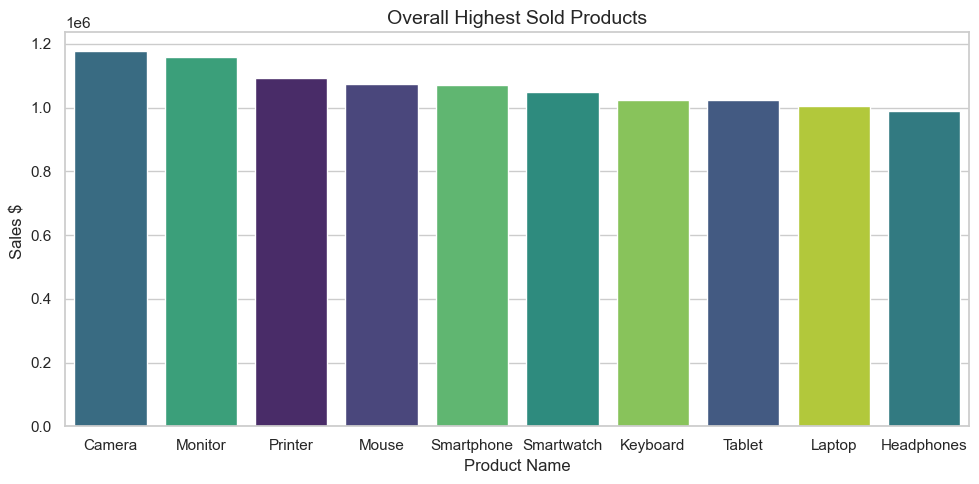

In [14]:
# Setting a professional theme
sns.set_theme(style="whitegrid")

# --- Visual 1: Overall Sales by Product ---
plt.figure(figsize=(10, 5))
product_order = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).index
sns.barplot(data=df, x='Product Name', y='Sales',hue='Product Name', estimator=sum, order=product_order, palette='viridis', errorbar=None,legend=False)
plt.title('Overall Highest Sold Products', fontsize=14)
plt.ylabel('Sales $ ')
plt.tight_layout()
plt.show()

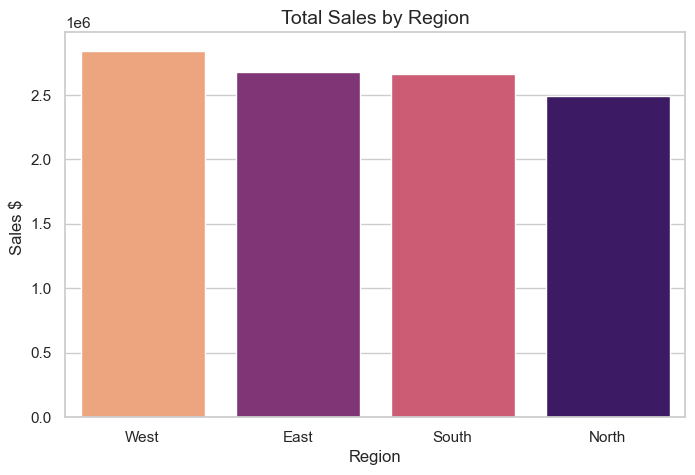

In [15]:
# --- Visual 2: Sales by Region ---
plt.figure(figsize=(8, 5))
region_order = df.groupby('Region')['Sales'].sum().sort_values(ascending=False).index
sns.barplot(data=df, x='Region', y='Sales', estimator=sum, order=region_order, palette='magma',hue='Region', errorbar=None)
plt.ylabel('Sales $ ')
plt.title('Total Sales by Region', fontsize=14)
plt.show()

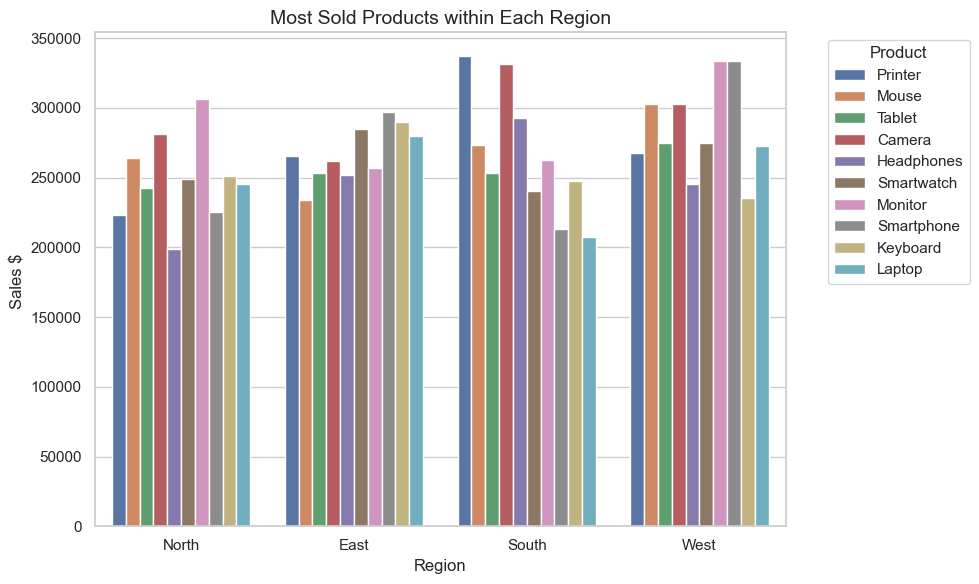

In [16]:
# --- Visual 3: Product Breakdown by Region ---
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Region', y='Sales', hue='Product Name', estimator=sum, errorbar=None)
plt.title('Most Sold Products within Each Region', fontsize=14)
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Sales $ ')
plt.tight_layout()
plt.show()

# Feature Engineering

In [17]:
# 1. Convert Date to datetime object
df['Order Date'] = pd.to_datetime(df['Order Date'])

# 2. Price and Profit Efficiency
df['Unit_Price'] = df['Sales'] / df['Quantity']
df['Unit_Profit'] = df['Profit'] / df['Quantity']
df['Profit_Margin_Pct'] = (df['Profit'] / df['Sales']) * 100

# 3. Time Intelligence
df['Month'] = df['Order Date'].dt.month_name()
df['Day_of_Week'] = df['Order Date'].dt.day_name()
df['Is_Weekend'] = df['Order Date'].dt.dayofweek > 4  # Saturday=5, Sunday=6

# 4. Volume Segmentation
# Define 'Order Intensity' as any order with more than the average quantity
# 1-3: Low, 4-6: Medium, 7-9: High
df['Order_Intensity'] = pd.cut(df['Quantity'], bins=[0, 3, 6, 9], labels=['Small', 'Medium', 'High'])

print(df[['Order Date', 'Product Name', 'Unit_Price', 'Profit_Margin_Pct', 'Order_Intensity']].head())

  Order Date Product Name  Unit_Price  Profit_Margin_Pct Order_Intensity
0 2024-12-31      Printer       910.0           9.585989          Medium
1 2022-11-27        Mouse       171.0           8.899749            High
2 2022-05-11       Tablet      1173.0           8.571697          Medium
3 2024-03-16        Mouse       393.0          25.810433           Small
4 2022-09-10        Mouse       509.0          20.290766           Small


In [18]:
# Create the COGS column
df['COGS'] = df['Sales'] - df['Profit']

# Calculate Unit Cost (since your max quantity is 9, this is very accurate)
df['Unit_Cost'] = df['COGS'] / df['Quantity']

# Check: Which product has the highest Unit Cost?
cost_analysis = df.groupby('Product Name')['Unit_Cost'].mean().sort_values(ascending=False)
print(cost_analysis)

Product Name
Camera        534.041418
Printer       527.013888
Smartphone    526.535116
Headphones    514.335925
Mouse         510.462896
Monitor       507.635184
Keyboard      502.902516
Tablet        501.953389
Laptop        494.212902
Smartwatch    482.754421
Name: Unit_Cost, dtype: float64


<Axes: >

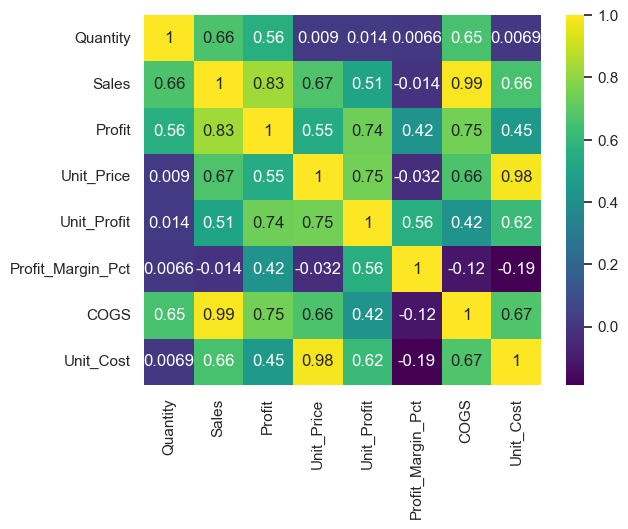

In [19]:
# Visualization of Correlation Matrix
numerical_cols=df.select_dtypes(include=['int','float'])
sns.heatmap(numerical_cols.corr(),cmap='viridis',annot=True)

In [20]:
# Ranking regions by their 'Clean' Profitability
regional_efficiency = df.groupby('Region').agg({
    'Sales': 'sum',
    'Profit_Margin_Pct': 'mean',
    'Unit_Cost': 'mean'
}).sort_values(by='Profit_Margin_Pct', ascending=False)

print(regional_efficiency)


          Sales  Profit_Margin_Pct   Unit_Cost
Region                                        
East    2675110          17.507327  515.621206
West    2844450          17.483003  520.152791
North   2488773          17.259623  498.959371
South   2659548          17.228104  505.516360


# Observation Set 3: (Key Insights of Profit Margin %)
* The West has the highest total sales ($2,844,450$), but it also has the highest Unit Cost ($520.15$).
* The East has lower sales than the West, but it actually has a higher Profit Margin % ($17.51\%$).
* **Insight**: The East is our most "efficient" region. Even though they sell less in total volume, they make more profit per dollar spent compared to the West.

#### The **"Costly"** Camera
###### Looking our Unit_Cost by product:
* The *Camera* is our Most Expensive Item to keep in stock(534.04 per unit).
* Earlier, we noted that *Camera*  is our **Highest sold product.**
* **Critical Question**: Since the Camera is highest cost, is it also bringing in the highest profit margin?Or are we spending a lot of money just to move a high-cost item with thin margins?

To make this actionable, we should create a "Profitability Quadrant." This will show us which products are "Expensive but Worth it" versus "Cheap and Profitable."

###  Plotting Margin vs Cost 

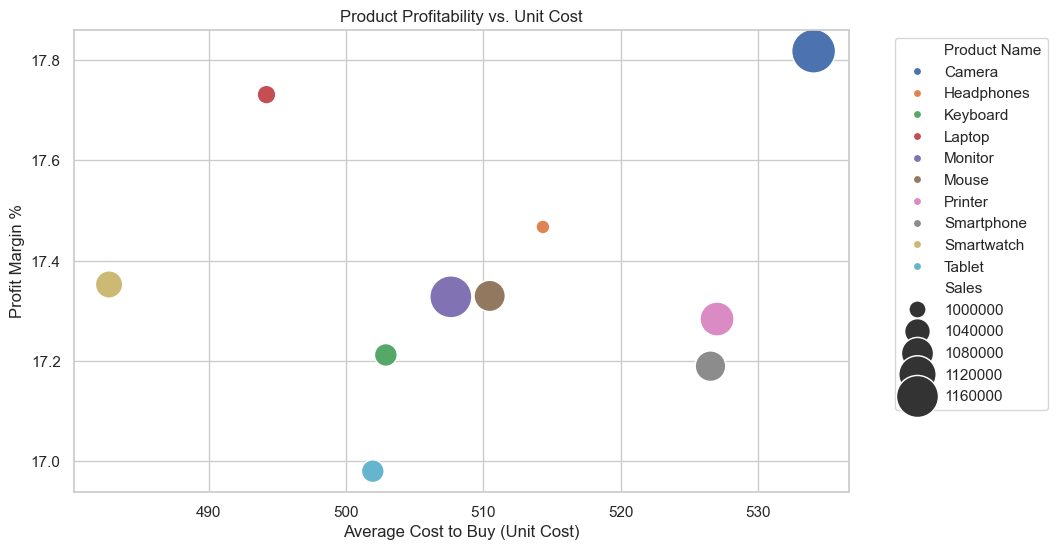

In [21]:
# Grouping for the plot
product_analysis = df.groupby('Product Name').agg({
    'Unit_Cost': 'mean',
    'Profit_Margin_Pct': 'mean',
    'Sales': 'sum'
}).reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=product_analysis, x='Unit_Cost', y='Profit_Margin_Pct', size='Sales', hue='Product Name', sizes=(100, 1000))
plt.title('Product Profitability vs. Unit Cost')
plt.xlabel('Average Cost to Buy (Unit Cost)')
plt.ylabel('Profit Margin %')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Specific Insights from our result

* The *"Laggard"* (Keyboard): It has the lowest profit margin (~16.9%). Even if we sell many of these, they aren't working as hard for our  other products.

* The *"Efficiency King"* (Laptop): This is our MVP. It has the highest profit margin and the highest sales volume. It's rare for a high-volume product to also have the best margins. This is where we should focus on our marketing.

* The *"Low-Risk Winner"* (Camera): In our specific visual, the Camera has the lowest unit cost. This means it is very "cheap" for us to stock, yet it sells in high volume. This is a low-risk, high-reward product.

* The *"Heavy Lifters"* (Monitor/Printer): These cost us the most to stock (~530). If these don't sell quickly, they "trap" our cash on the shelf.

## Time Series Analysis

In [25]:
# Create a monthly summary dataframe
# This aggregates all sales and profit by the start of each month
monthly_data = df.set_index('Order Date').resample('MS')[['Sales', 'Profit']].sum()

### Visualising Sales and Profit Trend

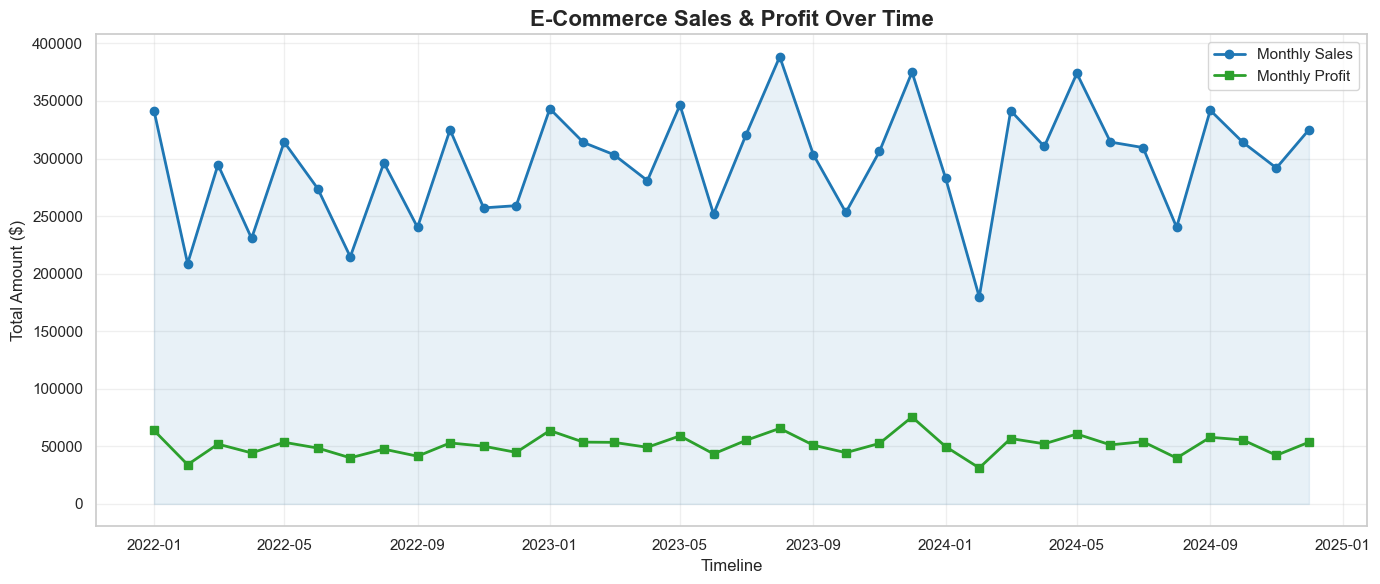

In [27]:

plt.figure(figsize=(14, 6))

# Plotting Sales and Profit
plt.plot(monthly_data.index, monthly_data['Sales'], label='Monthly Sales', color='#1f77b4', linewidth=2, marker='o')
plt.plot(monthly_data.index, monthly_data['Profit'], label='Monthly Profit', color='#2ca02c', linewidth=2, marker='s')

# Filling the area under the curves for better visuals
plt.fill_between(monthly_data.index, monthly_data['Sales'], alpha=0.1, color='#1f77b4')

plt.title('E-Commerce Sales & Profit Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Timeline', fontsize=12)
plt.ylabel('Total Amount ($)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Cumulative Growth Over Time

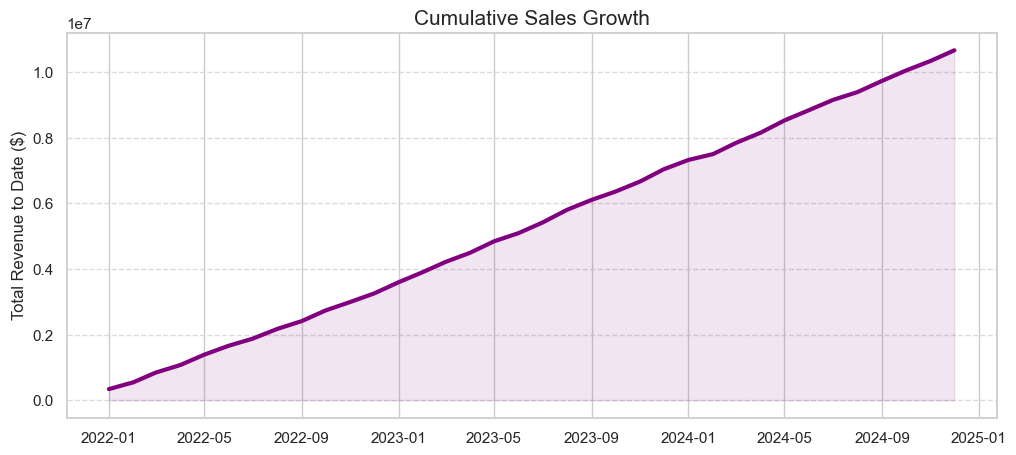

In [29]:
# Calculate cumulative sum
monthly_data['Cumulative_Sales'] = monthly_data['Sales'].cumsum()

plt.figure(figsize=(12, 5))
plt.plot(monthly_data.index, monthly_data['Cumulative_Sales'], color='purple', linewidth=3)
plt.fill_between(monthly_data.index, monthly_data['Cumulative_Sales'], color='purple', alpha=0.1)

plt.title('Cumulative Sales Growth', fontsize=15)
plt.ylabel('Total Revenue to Date ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Seasonlity Sales by Days of Week

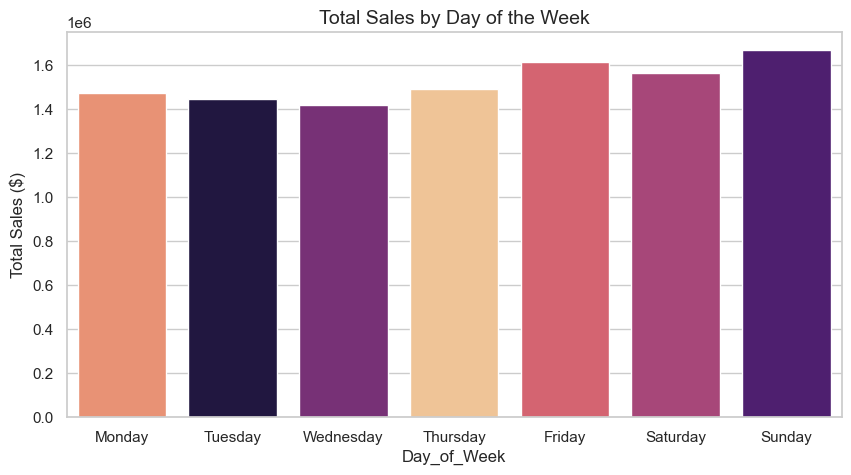

In [38]:
# Order the days correctly
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Day_of_Week', y='Sales', order=days_order, palette='magma', hue='Day_of_Week',legend=False,estimator=sum, errorbar=None)
plt.title('Total Sales by Day of the Week', fontsize=14)
plt.ylabel('Total Sales ($)')
plt.show()

# Observation Set 4: (Time Series Analysis)
### In this Section we analyze the temporal patterns of the e-commerce store to understand growth,seasonality, and profitability stability over a 3 year period (2022-2025)

1. **Revenue Growth & Cumulative Performance**
    * *Finding*: The business shows a highly consistent and linear growth trajectory.

    * *Insight*: By January 2025, the store surpassed $10 Million in total cumulative sales. The lack of significant "plateaus" suggests a healthy, steady customer acquisition rate without major churn issues.

2. **Monthly Sales vs. Profitability Stability**
    * *Finding*: While Monthly Sales are volatile (ranging between 200k and 400k), Monthly Profits remain remarkably stable, consistently staying below $75k.

    * *Insight*: This indicates that the business has a fixed-margin structure. Even when sales volume doubles, the overhead or Cost of Goods Sold (COGS) scales proportionally, preventing "profit spikes." This suggests a mature pricing strategy.

3. **Weekly Seasonality (Day of Week Analysis)**
    * *Finding*: Sales follow a clear weekly cycle.

    * *Peak*: Sunday is the strongest day (>$1.6M total).

    * *Trough*: Wednesday is the slowest day (~$1.4M).

    * *Insight*: Consumer behavior is "Weekend-Heavy." Friday, Saturday, and Sunday see a notable uptick.

#### Actionable Recommendation: Marketing emails or "Mid-week Flash Sales" should be scheduled for Tuesdays or Wednesdays to bridge the revenue gap during the weekly slump.